In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/DL_Project'

Mounted at /content/drive
/content/drive/MyDrive/DL_Project


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/.shortcut-targets-by-id/188uhktg5r_HMAL5KKPJPVphLIW6Ze-Ug/DL_Project")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/gdrive/MyDrive/DL_Project/PlantVillage'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)

    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)
    
    plant_disease_folder_list = listdir(directory_root)
    print(plant_disease_folder_list)
    for disease_folder in plant_disease_folder_list :
        # remove .DS_Store from list
        if disease_folder == ".DS_Store" :
            plant_disease_folder_list.remove(disease_folder)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{directory_root}/{plant_disease_folder}/")
            
        for single_plant_disease_image in plant_disease_image_list :
            if single_plant_disease_image == ".DS_Store" :
                plant_disease_image_list.remove(single_plant_disease_image)
        
        for image in plant_disease_image_list[:300]:
            image_directory = f"{directory_root}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tom

In [ ]:
image_size = len(image_list)

In [ ]:
image_size

4351

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

OSError: ignored

In [ ]:
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

OSError: ignored

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

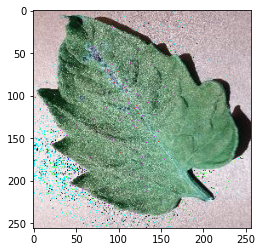

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow((np_image_list[5]*255).astype(np.uint8))

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(height, width, depth)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(15, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                975       
Total params: 18,922,511
Trainable params: 4,207,823
Non-

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
73/73 [==============================] - 102s 872ms/step - loss: 0.3311 - accuracy: 0.1786 - val_loss: 0.1591 - val_accuracy: 0.5753
Epoch 2/25
73/73 [==============================] - 46s 625ms/step - loss: 0.1460 - accuracy: 0.5898 - val_loss: 0.1246 - val_accuracy: 0.6548
Epoch 3/25
73/73 [==============================] - 45s 618ms/step - loss: 0.1148 - accuracy: 0.6873 - val_loss: 0.0928 - val_accuracy: 0.7597
Epoch 4/25
73/73 [==============================] - 45s 616ms/step - loss: 0.0925 - accuracy: 0.7586 - val_loss: 0.0828 - val_accuracy: 0.7817
Epoch 5/25
73/73 [==============================] - 45s 616ms/step - loss: 0.0800 - accuracy: 0.7861 - val_loss: 0.0800 - val_accuracy: 0.7783
Epoch 6/25
73/73 [==============================] - 45s 616ms/step - loss: 0.0658 - accuracy: 0.8360 - val_loss: 0.0739 - val_accuracy: 0.8020
Epoch 7/25
73/73 [==============================] - 45s 616ms/step - loss: 0.0617 - accuracy: 0.8396 - val_loss: 0.0600 - val_accuracy: 0.839

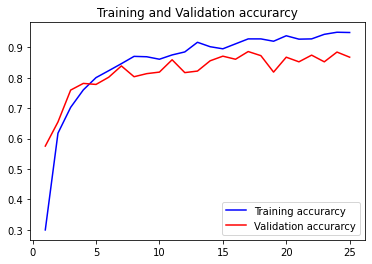

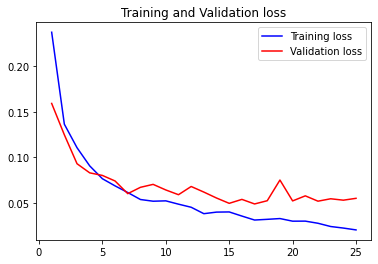

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
19/19 [==============================] - 5s 282ms/step - loss: 0.0548 - accuracy: 0.8680
Test Accuracy: 86.80202960968018


In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/gdrive/MyDrive/DL_Project/VGG16model.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/gdrive/MyDrive/DL_Project/VGG16model.h5")
print("\nModel weights saved!")

model.save("VGG16.hdf5")